#Homework 2 ADM

## Import utils and Dataframe

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
## Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
from matplotlib.ticker import PercentFormatter
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, jarque_bera, mannwhitneyu, spearmanr


pd.options.display.min_rows = 99999

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path = '/content/drive/MyDrive/Homework II/archive/steam_reviews.csv'

This is just a pattern to upload what you need for the question, to load your dataset with your needed columns, write just the columns you need for other questions

In [4]:
## Load Data and drop duplicates.
df = pd.read_csv(path)
df = df.drop_duplicates()

## [RQ1]

After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our dataset? Please summarize its main characteristics with visual and tabular methods.

In this first phase of exploratory analysis, we focus on extracting important features from the data. The first step is to calculate the size of the data set. For this first problem the entire data set has been loaded to understand its characteristics, then to deal with the different tasks will be considered only the variables of interest.

In [5]:
## Size and type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

Note that this dataset contains *21747371 observations(rows)* for *23 features (columns)*. There are also **integer**, **floating** and **boolean** variables.


In [6]:
## Null values
df.isnull().sum()

Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33742
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

Another important operation to be carried out during the EDA concerns the counting of **zero values**. In this case, **33742** null values are recorded for the variable **review**, **25682** for the variable **author.playtime_at_review** and **two** null values for the variables **author.playtime_forever**, **author.playtime_last_two_weeks**, **author.last_played**. However, no interpolation technique or substitution of missing values by point estimates has been applied (example: mean or median interpolation) as the variables mentioned above were not useful for the analysis.

In [7]:
## First 5 observations
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,0.0,0,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,0.0,0,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,0.0,0,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.0,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,0.0,0,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [8]:
## Last 5 observations
df.tail()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
21747366,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,0,0.000000,0,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
21747367,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,0,0.000000,0,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09
21747368,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,0,0.474138,0,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09
21747369,21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,1584986631,1586382422,True,0,0,0.386022,11,True,False,False,76561198041763187,140,3,210.0,0.0,12.0,1.589715e+09
21747370,21747375,546560,Half-Life: Alyx,65644930,schinese,WMR加载中闪退，无法进入游戏\nWMR Flashback in Load，cant pl...,1584986505,1592060800,True,0,0,0.416107,5,True,False,False,76561198116747069,253,7,1062.0,0.0,8.0,1.602858e+09


Another step is to observe the head and the tail of the data respectively to have a first *visual approach* of the table under examination. Proceed by displaying only the first 5 observations and the last 5 because the size of the dataset does not allow a complete display. After the first phase of exploration of data types, characteristics are extracted from the data. The first question that arises is how many videogames are present in the dataset.

In [9]:
## How many different VideoGames?
df.app_name.nunique()

315

Below is a ranking of the twenty games with more **reviews**. In particular, for each game there is the number of reviews expressed both in absolute value, also reported in the barplot that follows, that in relative value, that is in percentage of the total of the reviews present in the dataset.

In [10]:
## Percentage of Top 20 games with the most reviews
total = df.app_name.value_counts().sum()
perc = round(df.app_name.value_counts() / total * 100, 3)
print('Percentage of Top 20 games with the most reviews: \n')
perc.head(20)


Percentage of Top 20 games with the most reviews: 



PLAYERUNKNOWN'S BATTLEGROUNDS     7.561
Grand Theft Auto V                4.686
Tom Clancy's Rainbow Six Siege    3.871
Terraria                          3.094
Garry's Mod                       3.014
Rust                              2.525
Rocket League                     2.293
PAYDAY 2                          2.243
Among Us                          2.232
The Witcher 3: Wild Hunt          2.158
Dead by Daylight                  1.926
ARK: Survival Evolved             1.839
Euro Truck Simulator 2            1.782
Stardew Valley                    1.452
The Elder Scrolls V: Skyrim       1.356
Wallpaper Engine                  1.346
Monster Hunter: World             1.338
Hollow Knight                     1.241
The Forest                        1.102
Don't Starve Together             1.097
Name: app_name, dtype: float64

Text(0.5, 1.0, 'Top 20 games with the most reviews')

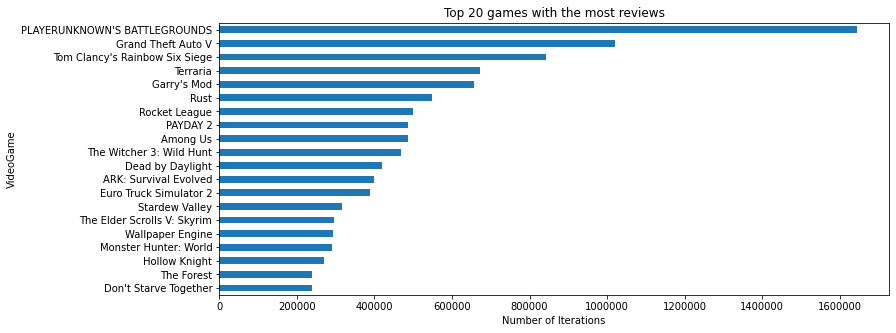

In [11]:
## Plot of the 20 games with the most reviews 
df.app_name.value_counts().head(20).sort_values(ascending = True).plot.barh(figsize = (12, 5)).get_xaxis().get_major_formatter().set_scientific(False)
plt.ylabel('VideoGame')
plt.xlabel('Number of Iterations')
plt.title('Top 20 games with the most reviews')

The 20 videogames with more reviews are shown in the figure. 
Note that at the top of the ranking there is the videogame **PLAYERUNKNOWN’S BATTLEGROUNDS** with more than a million and six hundred thousand reviews received and a percentage of **7.5%**.
The second game by number of reviews is **Grand Theft Auto V**, with just over a million reviews and a percentage of **4.68%**.
Following is **Tom Clancy’s Rainbow Six Siege** with more than eight hundred thousand reviews and a percentage of **3.87%**.
It is interesting to note that the gap between the first and the second videogame is much more marked than the differences that occur, for example, between the second and third videogame. This indicates a distinct advantage in terms of the number of reviews for the game **PLAYERUNKNOWN’S BATTLEGROUNDS**.

Text(0.5, 1.0, "Distribution of Recommended - PLAYERUNKNOWN'S BATTLEGROUNDS")

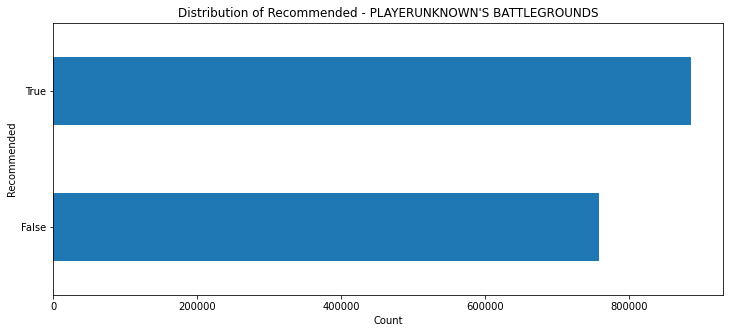

In [12]:
## Distribution of Recommended by PLAYERUNKNOWN'S BATTLEGROUNDS 
plt1 = df[df["app_name"] ==  "PLAYERUNKNOWN'S BATTLEGROUNDS"]
plt1.recommended.value_counts().sort_values(ascending = True).plot.barh(figsize = (12, 5)).get_xaxis().get_major_formatter().set_scientific(False)
plt.ylabel('Recommended')
plt.xlabel('Count')
plt.title("Distribution of Recommended - PLAYERUNKNOWN'S BATTLEGROUNDS")

In addition to the number of reviews received, however, it is very useful and above all interesting to understand the percentage of positive reviews on the total of reviews received. In fact, the total number of reviews received does not add any information about the popularity of that game by that audience, but it just gives you an idea of how popular it is and makes you talk about it.
Taking advantage of the presence of the boolean variable **Recommended** within the dataset, which indicates whether the review received is positive or not, or recommend the app or not, you can condition it and make a plot.
As you can see, in fact, the game under consideration is very popular but *divides* users who have shared more than eight hundred thousand positive reviews, but also more than seven hundred thousand negative reviews.

Text(0.5, 1.0, 'Distribution of Recommended - Grand Theft Auto V')

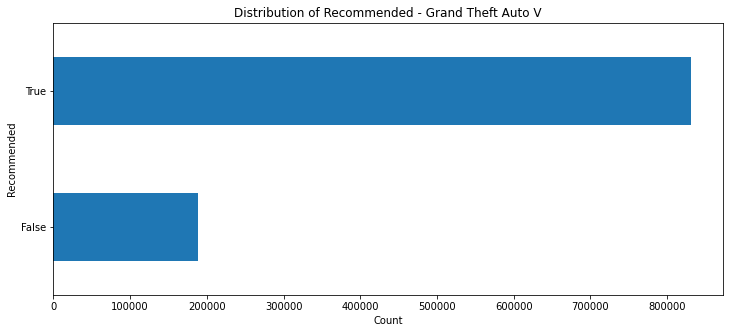

In [13]:
## Distribution of Recommended by Grand Theft Auto V 
plt2 = df[df["app_name"] ==  "Grand Theft Auto V"]
plt2.recommended.value_counts().sort_values(ascending = True).plot.barh(figsize = (12, 5)).get_xaxis().get_major_formatter().set_scientific(False)
plt.ylabel('Recommended')
plt.xlabel('Count')
plt.title("Distribution of Recommended - Grand Theft Auto V")

Opposite situation you notice on the second game.
There are in fact more than eight hundred thousand positive reviews and less than two hundred thousand negative reviews, which means that **most users of this game like it**. In particular, the percentage is about **80%**.

**----------------------------------------------------------------------------**

Shifting the focus to the **language** variable, the first question asked is how many languages are present in the dataset? 
Or in how many different languages were the reviews written?

Later, the most commonly used languages for writing reviews were plotted.

In [14]:
## How many different languages ​​were the reviews written in?
df.language.nunique()

28

In [15]:
## Percentage of used languages for review
total_lang = df.language.value_counts().sum()
perc_lang = round(df.language.value_counts() / total_lang * 100, 3)
print('Percentage of used languages reviews: \n')
perc_lang

Percentage of used languages reviews: 



english       44.306
schinese      17.312
russian       10.801
brazilian      3.851
spanish        3.740
german         3.461
turkish        2.924
koreana        2.822
french         2.491
polish         2.279
tchinese       1.003
czech          0.616
italian        0.613
thai           0.586
japanese       0.376
portuguese     0.374
swedish        0.369
dutch          0.357
hungarian      0.326
latam          0.322
danish         0.257
finnish        0.252
norwegian      0.169
romanian       0.151
ukrainian      0.097
greek          0.067
bulgarian      0.048
vietnamese     0.030
Name: language, dtype: float64

Text(0.5, 1.0, 'Used languages \u200b\u200bfor reviews')

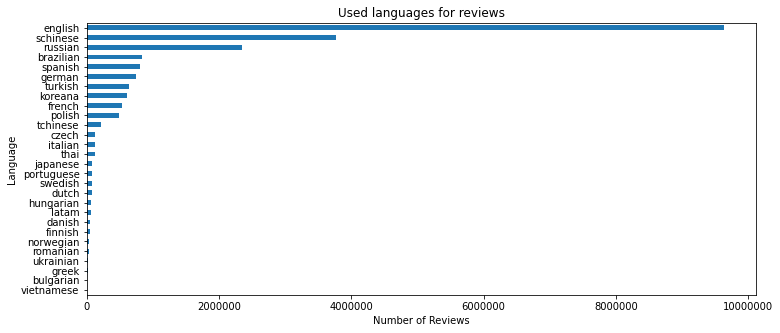

In [16]:
## Plot most used languages for reviews
df.language.value_counts().sort_values(ascending = True).plot.barh(figsize = (12, 5)).get_xaxis().get_major_formatter().set_scientific(False)
plt.ylabel('Language')
plt.xlabel('Number of Reviews')
plt.title('Used languages ​​for reviews')

As one might expect, nearly ten billion reviews have been written in **english**, which is therefore the most widely used language for reviews in **44.3%** of cases.
In second place is the simplified **chinese**, with four million reviews and a percentage of **17.3%** followed by the **russian** with more than two million reviews and a percentage of **10.8%**.
It is interesting to note that the english language is the most widely used for the publication of reviews.

Text(0.5, 1.0, 'Distribution of Recommended')

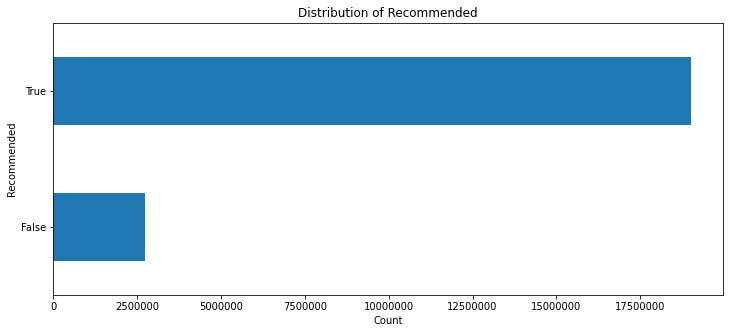

In [17]:
## Distribution of Recommended
df.recommended.value_counts().sort_values(ascending = True).plot.barh(figsize = (12, 5)).get_xaxis().get_major_formatter().set_scientific(False)
plt.ylabel('Recommended')
plt.xlabel('Count')
plt.title('Distribution of Recommended')

At the end of this first step concerning EDA, one can concentrate without any kind of conditioning on the other variables, on the type of recommendation, if it is positive or negative. You see how most reviews regarding the games in this data set are positive, with a small portion of negative reviews.


### [RQ2]

Let's explore the dataset by finding simple insights into the reviews.


* Plot the number of reviews for each application in descending order.
* What applications have the best Weighted Vote Score?
* Which applications have the most and the least recommendations?
* How many of these applications were purchased, and how many were given for free?

### [RQ2 - a]

Text(0.5, 1.0, 'Top 20 games with the most reviews')

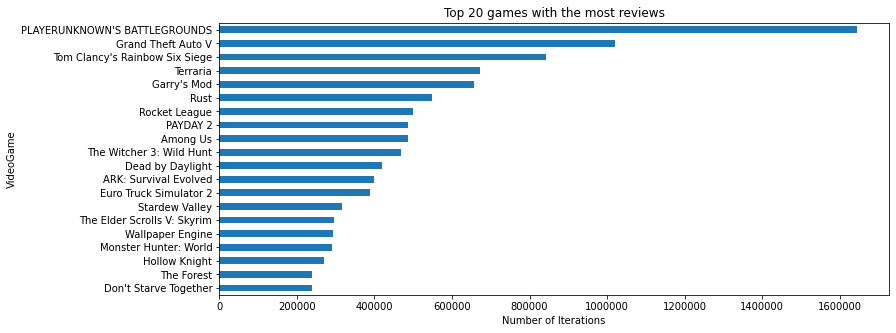

In [18]:
## Plot of the 20 games with the most reviews 
df.app_name.value_counts().head(20).sort_values(ascending = True).plot.barh(figsize = (12, 5)).get_xaxis().get_major_formatter().set_scientific(False)
plt.ylabel('VideoGame')
plt.xlabel('Number of Iterations')
plt.title('Top 20 games with the most reviews')

for comment see EDA point.

### [RQ2 - b]

In [19]:
## Applications with best Weighted Vote Score
wvs = df.groupby(['app_name']).weighted_vote_score.max().sort_values(ascending = False).head(20)
print('Applications with best Weighted Vote Score:\n', wvs)

Applications with best Weighted Vote Score:
 app_name
Stardew Valley                 0.995987
Divinity: Original Sin 2       0.995245
Subnautica                     0.994453
Mirror                         0.994038
Wallpaper Engine               0.993540
Terraria                       0.992892
The Forest                     0.992581
Monster Hunter: World          0.992500
The Elder Scrolls Online       0.992356
Human: Fall Flat               0.992336
DARK SOULS™ III                0.992332
No Man's Sky                   0.992270
Undertale                      0.992158
Kenshi                         0.991505
DEATH STRANDING                0.991487
Watch_Dogs 2                   0.991107
Darkest Dungeon®               0.990796
Frostpunk                      0.990510
The Elder Scrolls V: Skyrim    0.990440
The Witcher 3: Wild Hunt       0.990385
Name: weighted_vote_score, dtype: float64


The table below shows that the game with the highest weighted score is **Stardew Valley** with a score of **0.996**, followed by **Divinity: Original Sin 2** with a score of **0.995** and with the game **Subnautica** with a score of **0.994**.

### [RQ2 - c]

In [20]:
## Applications have the most and the least recommendations 
rec = df.groupby(['app_name']).recommended.sum().sort_values(ascending = False)
print('Top ten:\n', rec.head(10))

print('Last ten:\n', rec.tail(10))

Top ten:
 app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     886417
Grand Theft Auto V                831311
Tom Clancy's Rainbow Six Siege    742397
Terraria                          658741
Garry's Mod                       632558
Rust                              468892
Among Us                          463287
The Witcher 3: Wild Hunt          460252
Rocket League                     449464
PAYDAY 2                          428136
Name: recommended, dtype: int64
Last ten:
 app_name
Down To One                    797
Urban Empire                   759
Umbrella Corps                 707
Hunt Down The Freeman          689
Rapture Rejects                672
Out of the Park Baseball 19    594
Shadow Complex Remastered      587
Identity                       439
DRAGON QUEST HEROES™ II        423
Neon Hardcorps                  89
Name: recommended, dtype: int64


The table shows that applications with more recommendations are **PLAYERUNKNOWN’S BATTLEGROUNDS**, followed by **Grand Theft Auto V** and **Tom Clancy’s Rainbow Six Siege**.
While the last three apps with the least recommendations are **Identity**, followed by **DRAGON QUEST HEROES™ II** and **Neon Hardcorps**.

### [RQ2 - d]

In [21]:
## How many of these applications were purchased, and how many were given for free?
use = ['received_for_free']
df2 = pd.read_csv(path, usecols = use)

In [22]:
free = df2.sum().reset_index()[0][0]
tot = df2.shape[0]
purch = tot - free
print(f'Applications purchased: {round((purch / tot * 100), 2)}% ({purch}). Applications given for free: {round((free / tot * 100), 2)}% ({free}).')

Applications purchased: 96.84% (21059310). Applications given for free: 3.16% (688061).


## [RQ3]

Now it's important to understand the preferred time to do reviews.

* What is the most common time that authors review an application? For example, authors usually write a review at 17:44.
* Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
* Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

In [23]:
from datetime import datetime

In [24]:
## Create a function for parsing date.
def dateparse(time_in_secs):
  return pd.to_datetime(time_in_secs, unit = 's')

### [RQ3 - a]

In [25]:
## Parsing timestamp_created and timestamp_updated.
df3 = df.filter(['timestamp_created', 'timestamp_updated', 'review_id'])
df3.timestamp_created = dateparse(df3.timestamp_created);
df3.timestamp_updated = dateparse(df3.timestamp_updated);

In [26]:
## Most common time that authors review an application.
df3.timestamp_created.dt.time.value_counts().head(3)

15:54:53    583
17:56:41    393
15:24:50    390
Name: timestamp_created, dtype: int64

Text(0.5, 1.0, 'Number of reviews for most commont time')

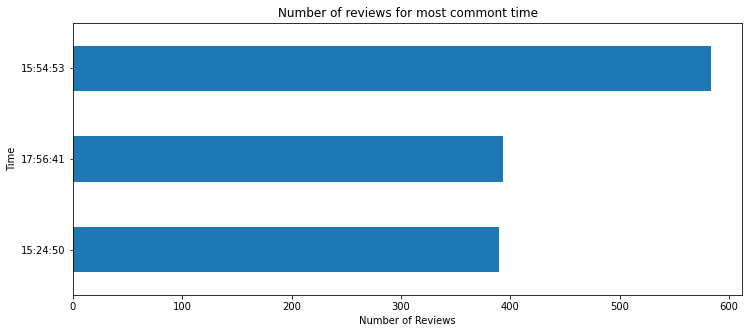

In [27]:
## Plot of Number of reviews for commont time.
df3.timestamp_created.dt.time.value_counts().head(3).sort_values(ascending = True).plot.barh(figsize = (12, 5)).get_xaxis().get_major_formatter().set_scientific(False)
plt.ylabel('Time')
plt.xlabel('Number of Reviews')
plt.title('Number of reviews for most commont time')

As we can see from the graph above, the highest number of reviews is registered at **15:54:53**.

### [RQ3 - b]

In [28]:
## Create Datetime_index
df3['Datetime'] = pd.to_datetime(df3['timestamp_created'])
df3 = df3.set_index('Datetime')

In [29]:
## Create a function
def fun(l):
    plot = []
    res = []
    for elem in range(0,len(l),2):
        iniz = l[elem]
        fin = l[elem+1]
        plot.append(df3.between_time(iniz,fin).count())
    for elem in plot:
        res.append(elem['review_id'])
    names = ['0: 06-10:59','1: 11-13:59','2: 14:00-16:59','3: 17-19:59','4: 20-23:59','5: 00-02:59','6: 03-05:59']
    plt.plot(names, res)
    plt.show()
    return 

### [RQ3 - c]

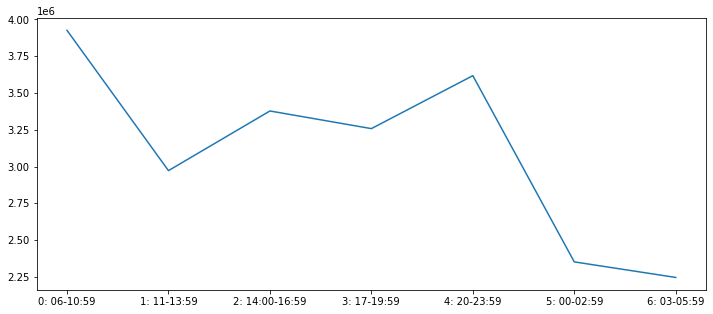

In [30]:
## Plot the number of reviews between the following time intervals.
plt.rcParams['figure.figsize'] = (12, 5)
times = ['06:00:00', '10:59:59','11:00:00', '13:59:59','14:00:00', '16:59:59','17:00:00', '19:59:59','20:00:00', '23:59:59','00:00:00', '02:59:59','03:00:00', '05:59:59']
fun(times)

As you can see from the graph that shows the **curve of the number of reviews for certain times**, the time slot where the **most reviews** are recorded is between **06:00** and **10:59:59**, while in the next phase reaches 13:59:59 the curve suffers a decrease, then climb up between 14 and 16:59:59 and stay almost constant until 19:59:59.
Finally, the second peak of the curve is recorded between 20:00 and 23:59 and then reach the **minimum between 03 and 05:59**.

## [RQ4]

As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

* What are the top 3 languages used to review applications?
* Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.
* Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?
* Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

### [RQ4 - a]

In [31]:
## Top 3 languages
print('Top 3 languages used: \n')
lng = df['language'].value_counts()[:3].index.tolist()
lng

Top 3 languages used: 



['english', 'schinese', 'russian']

### [RQ4 - b]

In [32]:
## Create a function
def fun(dataframe, lista):
    return df[df['language'].isin(lista)]

In [33]:
## Extract the subset of the dataframe (of top 3 languages).
df_f = fun(df, lng)

### [RQ4 - c]

In [34]:
## Percentage of these reviews (associated with the top 3 languages) were voted as funny.
print('Percentage of reviews written in the first 3 languages and voted as funny:')
print('{:.2f}%'.format(100 * (len(df_f[df_f['votes_funny'] > 0])) / len(df_f)))

Percentage of reviews written in the first 3 languages and voted as funny:
12.21%


### [RQ4 - d]

In [35]:
## Percentage of these reviews (associated with the top 3 languages) were voted as helpful.
print('Percentage of reviews written in the first 3 languages and voted as helpful:')
print('{:.2f}%'.format(100 * (len(df_f[df_f['votes_helpful'] > 0])) / len(df_f)))

Percentage of reviews written in the first 3 languages and voted as helpful:
29.16%


## [RQ5]

The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

* Plot the top 10 most popular reviewers and the number of reviews.
* What applications did the most popular author review?
* How many applications did he purchase, and how many did he get as free?Provide the number (count) and the percentage.
* How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

### [RQ5 - a]

Text(0, 0.5, 'Author ID')

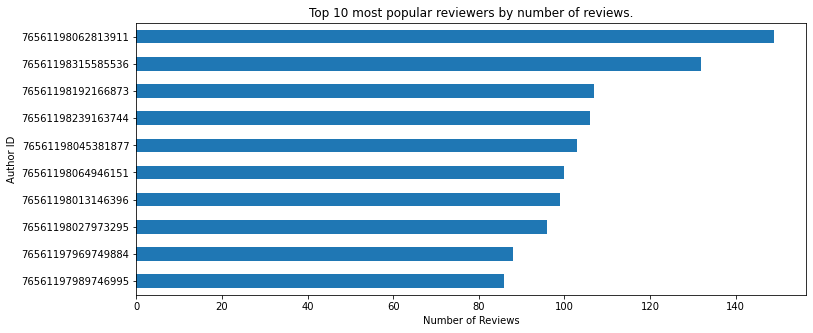

In [36]:
## Plot the top 10 most popular reviewers and the number of reviews.
df.groupby(['author.steamid']).size().sort_values(ascending = True).tail(10).plot.barh(figsize = (12, 5))
plt.title('Top 10 most popular reviewers by number of reviews.')
plt.xlabel('Number of Reviews')
plt.ylabel('Author ID')

### [RQ5 - b]

In [37]:
## What applications did the most popular author review?
most_reviews = df.loc[df['author.steamid'] == 76561198062813911]
games_reviewd = most_reviews['app_name']
games_reviewd

512675                               Half-Life
539037                  Counter-Strike: Source
658130                Half-Life 2: Episode Two
849477                                Portal 2
1549581                            Garry's Mod
1728583             Sid Meier's Civilization V
2141495                       Dead by Daylight
2252905            Sid Meier's Civilization VI
2392987                             Subnautica
2571139                       Human: Fall Flat
2646056                               Banished
2682381                                Celeste
2708381     Getting Over It with Bennett Foddy
2743294                          A Hat in Time
2913786                             The Forest
3289384                            Axiom Verge
3393685          The Binding of Isaac: Rebirth
3470835                            To the Moon
3474508                            Cave Story+
3481912                            Titan Souls
3510504                         Super Meat Boy
3527008      

### [RQ5 - c]

In [38]:
## How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?
free = most_reviews.loc[most_reviews['received_for_free'] == True]

In [39]:
## How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.
bought = most_reviews.loc[most_reviews['received_for_free'] == False]
print('Applications Purchase:\n', bought.shape[0], '\n', 'Applications Free:\n', free.shape[0], '\n', 'Percentage Applications Purchase on total review:\n', round(bought.shape[0]/most_reviews.shape[0], 3))

Applications Purchase:
 145 
 Applications Free:
 4 
 Percentage Applications Purchase on total review:
 0.973


### [RQ5 - d]

In [40]:
## How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?
pp = bought[bought['recommended'] == True].shape[0]
print('Applications that he purchased reviewed positively: \n', pp, )
'\n'
np = bought[bought['recommended'] == False].shape[0]
print('Applications that he purchased reviewed negatively: \n', np)
'\n'
fp = free[free['recommended'] == True].shape[0]
print('Applications that he received for free reviewed positively: \n', fp)
'\n'
fn = free[free['recommended'] == False].shape[0]
print('Applications that he received for free reviewed negatively: \n', fn)

print("On the applications that he bought the % of positives is: ", round(pp / (pp + np) * 100,3), "%", "While for the free2play apps the % is: ", fp / (fp + fn) * 100,"%")

Applications that he purchased reviewed positively: 
 142
Applications that he purchased reviewed negatively: 
 3
Applications that he received for free reviewed positively: 
 4
Applications that he received for free reviewed negatively: 
 0
On the applications that he bought the % of positives is:  97.931 % While for the free2play apps the % is:  100.0 %


## [RQ6]

It's time to get information from the updates that a user does to his reviews.

* What is the average time (days and minutes) a user lets pass before he updates a review?
* Plot the top 3 authors that usually update their reviews.

### [RQ6 - a]

In [41]:
## We consider only the observations related to the columns of interest and apply the parsing function.
df6 = df.filter(['timestamp_created', 'timestamp_updated', 'author.steamid'])
df6.timestamp_created = dateparse(df6.timestamp_created);
df6.timestamp_updated = dateparse(df6.timestamp_updated);

In [42]:
## We verify the parsing
df6.head()

,timestamp_created,timestamp_updated,author.steamid
0,2021-01-23 06:00:29,2021-01-23 06:00:29,76561199095369542
1,2021-01-23 05:50:30,2021-01-23 05:50:30,76561198949504115
2,2021-01-23 05:46:40,2021-01-23 05:46:40,76561199090098988
3,2021-01-23 05:32:50,2021-01-23 05:32:50,76561199054755373
4,2021-01-23 05:23:47,2021-01-23 05:23:47,76561199028326951


### [RQ6 - b]

In [43]:
## New dataframe used to see who changed the reviews
df6 = df6.loc[df6['timestamp_updated'] != df6['timestamp_created']]

Text(0.5, 0, 'Number of update')

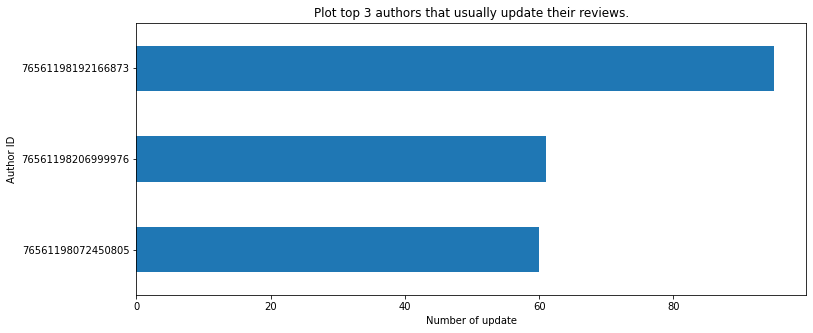

In [44]:
## Plot of the 3 authors who have changed their reviews more often
df6.groupby(['author.steamid']).size().sort_values(ascending = True).tail(3).plot.barh(figsize = (12, 5))
plt.title('Plot top 3 authors that usually update their reviews.')
plt.ylabel('Author ID')
plt.xlabel('Number of update')

In [45]:
## Create a new column 'min_difference' as a difference between 'timestamp_updated' e 'timestamp_created'
df6.insert(3, "min_difference", df6['timestamp_updated'] - df6['timestamp_created'])

In [46]:
## Average time (days and minutes) a user lets pass before he updates a review
df6["min_difference"].mean()

Timedelta('321 days 00:46:24.845181776')

## [RQ7]

Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.

* What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?
* What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?
* Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

### [RQ7 - a]

In [47]:
## Probability that a review has a Weighted Vote Score equal to or bigger than 0.5
## The probability is calculated as the number of cases where the weighted vote score is equal to or bigger than 0.5 by the total of observations.
pr = round(len(df.weighted_vote_score[df.weighted_vote_score >= .5]) / len(df.weighted_vote_score), 3)
print('The probability that a review has a Weighted Vote Score equal or bigger than 0.5 is: \n', pr)

The probability that a review has a Weighted Vote Score equal or bigger than 0.5 is: 
 0.22


### [RQ7 - b]

In [48]:
## Probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5
## We extract observations that exceed the condition.
w = df['weighted_vote_score'] > .5
v = df['votes_funny'] >= 1

In [49]:
## We calculate the individual probabilities for the two events.
pr_w = round(len(df.weighted_vote_score[df.weighted_vote_score > .5]) / len(df.weighted_vote_score), 3)
pr_v = round(len(df.votes_funny[df.votes_funny >= 1]) / len(df.votes_funny), 3)

In [50]:
## Intersection of events and calculation of the conditional probability.
res_intersect = w & v
res = df[res_intersect]
prob_intersect = res.shape[0] / df.shape[0]
res_prob = prob_intersect / pr_w
print('The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is: \n', round(res_prob, 3))

The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is: 
 0.249


### [RQ7 - c]

In [51]:
## Independent Events
## Two events are independent if the realization of one does not affect the probability distribution of the other
s = df['weighted_vote_score'] >= .5
res_intersect = s & v
res = df[res_intersect]
prob_intersect = res.shape[0] / df.shape[0]
res_ind = prob_intersect / pr_v
if res_ind == pr_v:
  print('The two events are independent.')
else:
  print('The two events are not independent.')

The two events are not independent.


## [RQ8]

Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.

* Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.
* Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.
* Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.
* What are histograms, bar plots, scatterplots and pie charts used for?
* What insights can you extract from a Box Plot?

### [RQ8 - a]

To check if there is a significant difference between the weighted score of reviews made in Chinese and those made in Russian, all comments related to the columns of the language and weighted vote are first selected; especially in order not to lose information from the data, are considered for reviews written in Chinese language, both reviews written in simplified Chinese and in traditional Chinese.
Then the idea is to apply a statistical test, in particular a **test-t**, on the average of two different and independent populations and then evaluate the p-value (*the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct*) associated with it. The test can be **applied to independent data values**, randomly sampled **from two normal population**s, where the two **independent groups have equal variances**.
For this reason, we begin by checking the hypothesis of equal variance between the two populations.

In [52]:
## We consider only the observations related to the columns of interest. 
df2 = df.filter(['language', 'weighted_vote_score'])

## We consider the observations written in Chinese and Russian.
x1 = df2[(df2['language'] == 'schinese') | (df2['language'] == 'tchinese')]
x2 = df2[df2['language'] == 'russian']

In [53]:
## Checking the hypotesis of equal variance
var_x1 = x1.weighted_vote_score.var()
var_x2 = x2.weighted_vote_score.var()
print("Variance of Chinese group: \n", round(var_x1, 3))
print("Variance of Russian group: \n", round(var_x2, 3))

Variance of Chinese group: 
 0.057
Variance of Russian group: 
 0.066


The difference between the variances of the two groups is minimal, indicating that the variability between the values of two groups is almost the same.
However, the most important assumption to be met in order to apply a test-t is the normal distribution. The normality of the distribution can be verified with graphical methods (Histogram - QQplot) and with statistical tests.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


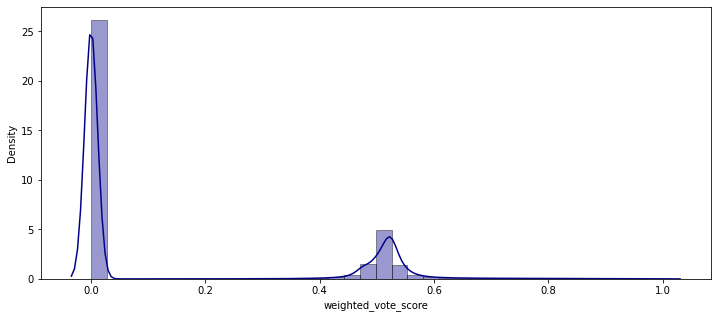

In [54]:
## Check Normalility - Histogram Plot
plt.rcParams['figure.figsize'] = (12, 5)
sns.distplot(x1.weighted_vote_score, hist = True, kde = True, 
             bins = int(180/5), color = 'darkblue', 
             hist_kws = {'edgecolor':'black'},)

From this graph we can see how the distribution is very far from the Gaussian one and how the values are discretized on the 0. Looking at the qqplot the result does not change.

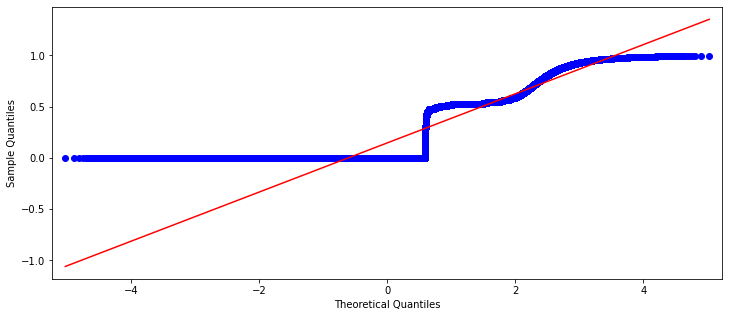

In [55]:
## Check Normality - Quantile Plot
qqplot(x1.weighted_vote_score, line = 's')
plt.show()

A final step that leaves no room for interpretation are the statistical tests of **Shapiro-Wilk** and **Jarque-Bera**.

In [56]:
## Shapiro-Wilk
stat, p = shapiro(x1.weighted_vote_score)
print('Statistics = %.3f, p-value = %.3f' % (stat, p))
## Intepret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

## Jarque-Bera
jb = jarque_bera(x1.weighted_vote_score)
stat, p = round(jb[0]), jb[1]
print('Statistics = %.3f, p-value = %.3f' % (stat, p))
## Intepret
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics = 0.602, p-value = 0.000
Sample does not look Gaussian (reject H0)
Statistics = 869595.000, p-value = 0.000
Sample does not look Gaussian (reject H0)


From both tests it emerges the **non-gaussianity** of the distribution and therefore the impossibility to apply the test-t.
For this reason, a **non-parametric test is performed**, namely the **Mann-Whitney test**. The result tells us that *the null hypothesis was rejected and your test is statistically significant*; the differences between your groups are significant and and populations are distinct.

In [57]:
## Test Mann-Whitney
res = mannwhitneyu(x1.weighted_vote_score, x2.weighted_vote_score)
print('Statistics = %.3f, p-value = %.3f' % (round(res[0],3), res[1]))
## Intepret
alpha = 0.05
if p > alpha:
  print('The difference is not due to random sampling (fail to reject H0)')
else:
	print('The difference is due to random sampling (reject H0)')

Statistics = 4084405689413.500, p-value = 0.000
The difference is due to random sampling (reject H0)


### [RQ8 - b]

To find a meaningful relationship between the time a user passes before updating the review and the weighted score, it is possible to study the link that may exist, both from a graphical and computational point of view.
First, only the variables of interest are selected and then create a new variable **Difftime** that indicates the time elapsed between the last written review and the last update Then we study the link of this new variable with the score.


In [58]:
## We consider only the observations related to the columns of interest. 
df3 = df.filter(['timestamp_created', 'timestamp_updated', 'weighted_vote_score'])

## Create a new column
df3["DiffTime"] = df3.timestamp_updated - df3.timestamp_created

## Drop Columns
df3 = df3.drop(['timestamp_created'], axis = 1)
df3 = df3.drop(['timestamp_updated'], axis = 1)

The first study can be done from **covariance**, a statistical index that measures how much two numerical variables are related to each other.
* If **cov(X, Y) = 0**, X and Y are **uncorrupted**; there is no linear link between them.
* If **cov(X, Y) > 0**, X and Y are positively **correlated**; positive (or negative) variations of one variable correspond, on average, to positive (negative) variations of the other variable.
* If **cov(X, Y) < 0**, X and Y are negatively **correlated**; positive variations of one variable correspond, on average, to negative variations of the other variable, and vice versa. 

In [59]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df3.cov()

,weighted_vote_score,DiffTime
weighted_vote_score,0.059,271332.234
DiffTime,271332.234,239401895853633.531


The covariance between the two variables of interest is positive.
However, covariance makes it possible to measure the presence of a linear bond, but not the strength of that bond.
For this the calculation of the correlation coefficient is introduced.
The correlation measures the linear link (if any) between two numerical variables.
The correlation quantifies this association, often as a measure between -1 to 1 values for a perfectly negative correlation and a perfectly positive correlation. The calculated correlation is called "correlation coefficient". 
In cases where the distribution of variables is Gaussian, the correlation of Bravais-Pearson can be calculated, while in this case it is necessary to calculate a **non-parametric correlation or that of Spearman**.


In [60]:
## Spearman Correlation
coef, p = spearmanr(df3.DiffTime, df3.weighted_vote_score)
print('Spearmans correlation coefficient: %.3f' % coef)
## Interpret
alpha = 0.05
if p > alpha:
	print('Samples are correlated (fail to reject H0) p-value =%.3f' % p)
else:
	print('Samples are uncorrelated (reject H0) p-value = %.3f' % p)

Spearmans correlation coefficient: 0.144
Samples are uncorrelated (reject H0) p-value = 0.000


The statistical test shows a strong positive correlation with a value of 0,1. The p-value is close to zero, which means that the probability of looking at the data since the samples are unrelated is very unlikely (for example 95% confidence) and that we can reject the null hypothesis that the samples are related.


Text(0.5, 1.0, 'DiffTime Vs. Weighted Vote Score')

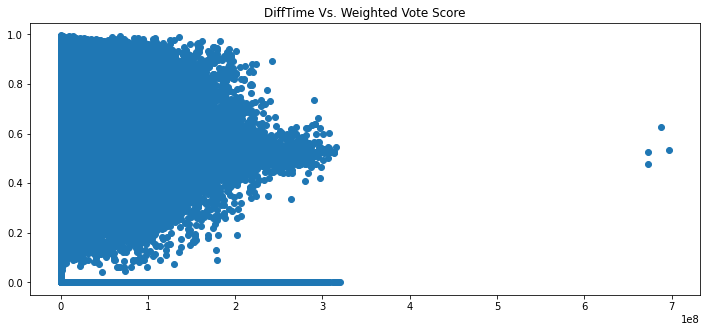

In [61]:
## Scatterplot
plt.scatter(df3.DiffTime, df3.weighted_vote_score)
plt.title('DiffTime Vs. Weighted Vote Score')


Even from the scatterplot you can see that there is neither a linear nor a non-linear bond. There is therefore no meaningful relationship.

### [RQ8 - c]

In [62]:
## We consider only the observations related to the columns of interest and create a new column.
df4 = df.filter(['timestamp_created', 'timestamp_updated', 'weighted_vote_score', 'recommended'])
df4["DiffTime"] = df4.timestamp_updated - df4.timestamp_created

Text(0.5, 1.0, 'DiffTime Vs. Weighted Vote Score (Recommended = False)')

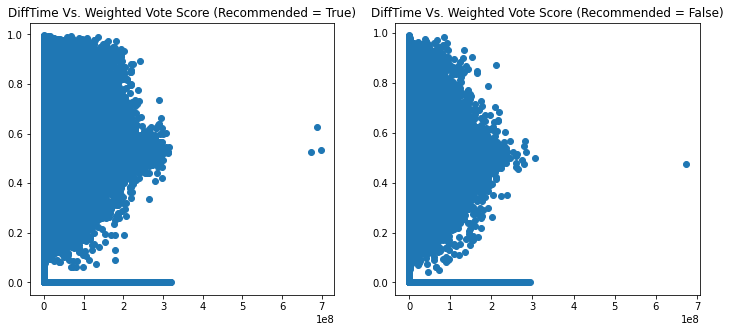

In [63]:
## Let us filter out the observations for which the positive and negative recommendations.
df_T = df4[df.recommended == True]
df_F = df4[df.recommended == False]

## Conditioning on recommended variable and plotting DiffTime Vs. Weighted Vote Score.
plt.subplot(1,2,1)
plt.scatter(df_T.DiffTime, df_T.weighted_vote_score, label = 'Recommended = True')
plt.title('DiffTime Vs. Weighted Vote Score (Recommended = True)')
plt.subplot(1,2,2)
plt.scatter(df_F.DiffTime, df_F.weighted_vote_score, label = 'Recommended = False')
plt.title('DiffTime Vs. Weighted Vote Score (Recommended = False)')


Even including a conditioning on the **recommended** variable, the relationship explored at the previous point does not change, as you can see from the scatterplot above.

### [RQ8 - d]

The histogram, barplot, scatterplot, and pie chart are exploratory analysis tools useful for graphically examining the data being studied to try to extract the characteristics present in the data.
In particular, it shall:
* **Histogram**: is a graph that traces the distribution of the values of a numerical variable as a series of bars. Each bar covers a range of numerical values called bin or class; the height of a bar indicates the frequency of the data points with a value within the corresponding bin. Histograms are useful for showing the general distributive characteristics of the data set variables. You can see roughly where the distribution peaks are, if the distribution is asymmetrical or symmetrical, and if there are outliers.
* **Barplot**: is one of the most common types of graphics. Unlike the histogram, it shows the relationship between a numerical variable and a categorical one. Each entity of the categorical variable is represented as a bar. The size of the bar represents its numerical value. The main difference with the histogram graph is that a histogram has only one numerical variable as input and shows its distribution.
* **Scatterplot**: is a chart type in which two variables of a data set are reported on a Cartesian space. The data are displayed through a collection of points each with a position on the horizontal axis determined by one variable and on the vertical axis determined by the other. The dispersion graphs show the relationship between two continuous variables, representing one variable on the x-axis and the other on the y-axis. For the correlation, they help to show the strength of the linear relationship between two variables, while for regression they often add an estimated line. In the dispersion plots for regression, the response variable is represented on the y-axis and the input variable on the x-axis. 
* **Piechart**:  is a circular statistical graph, divided into sections to illustrate the numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area) is proportional to the quantity it represents. Pie charts are widely used in business and mass media. However, they have been criticized, and many experts recommend avoiding them,  because research has shown that it is difficult to compare different sections of a given pie chart, or to compare data between different pie charts. Pie charts can be replaced in most cases by other charts such as bar chart, box plot, dot plot, etc

The **boxplot chart** is a simple and powerful representation of a univariate distribution, proposed by J.W.Tukey.
It is based on:
* **x_min**, the minimum value of the distribution.
* **Q1**, first quartile.
* **Med**, second quartile.
* **Q3**, third quartile.
* **x_max**, the maximum value of the distribution.
* **HInf** and **Hsup**, respectively lower and upper extremes, calculated with k = 1,5 or k = 3.
Through this display you can show the location, dispersion, symmetry, tails and suspicious outliers.
The median allows you to see the position of the distribution.
The interquartile range (IQR = Q3 - Q1) allows you to see the data dispersion and increases as it grows.
Still, you can see the asymmetry of the distribution by comparing the two boxes of the boxplot, ie (Q3 - Med) Vs (Med - Q1)
If the two boxes are the same, there is symmetry in the distribution.
If the left box is shorter than the right box, the distribution is asymmetric positive.
If the left box is longer than the right box, the distribution is asymmetrical negative.
Finally, looking at the moustache of the boxplot, you realize the presence of suspicious outliers and the length of the tails. The classification of outliers, in particular, is based on the "fences"; that is, it is based on the hypothesis that the regular data in the center are approximately symmetrical as in the standard normal case. In case of strong asymmetries, the "suspected outliers" of the boxplot are often the normal product of the data generating process.

**----------------------------------------------------------------------------**

## TQ1

* It computes the k-th element in ascending order present in the set.
* T(n + 1) + T(n + 2) + T(n + 3) + ... +T(1) = (n - 1) * O(n) -> O(n^2) if we don't consider the 'loop case'.
> The loop case occurs when r is equal to 1 and s is always assigned the maximum number selected by A. This does not decrease the length of L and allows it to not reach the base case.
* Omega(n)

## TQ2

* Let's first analyze swapList():
> The function works in /2 O(n)=O(n) because there is a loop in the order *O(n/2)* and the remaining operations in constant time. The total Splitswap time is: *T(n) = T(n/2) + T(n/2) + O(n)* because the function performs the first two operations with constant time generating two recursive calls of time *T(n) = T(n / 2).* Applying the main theorem, you will get: *T(n) = 2T(n/2) + O(n)* so *a = b = 2* and *f(n) = O(n)* . We fall in case 2 of MT: *𝑇(𝑛) = Θ(𝑛𝑙𝑜𝑔𝑏𝑎) ⟹ 𝑇(𝑛) = Θ(𝑛𝑙𝑜𝑔𝑏𝑎𝑙𝑜𝑔𝑛)* because *𝑙𝑜𝑔22 = 1*, so our *𝑇(𝑛) = 𝑂(𝑛𝑙𝑜𝑔𝑛)*. 
The algorithm that input the a array, an index l and a length n , leaves intact the first elements l-1 of the array. Then, starting from the element with index l, it takes a sub-array of length n. Actually, the algorithm does not create a sub-array but continues to operate on the original array to using the sections delimited by the indices l and n. The concept of sub-arrayarraySolo is only introduced to make the explanation easier. The operations are as follows:
>* the algorithm that input the a array, an index l and a length n , leaves intact the first elements l-1 of the array. Then, starting from the element with index l, it takes a sub-array of length n. Actually, the algorithm does not create a sub-array but continues to operate on the original array to using the sections delimited by the indices l and n. The concept of sub-arrayarraySolo is only introduced to make the explanation easier. The operations are as follows: the algorithm splits the sub-array in half and recursively repeats the operation until its length is equal to 1. Next, it returns to previous calls while running the swapList subroutine, which inverts the elements of each smaller subarray, until at the end of the calls the original subarray of length n appears inverted.
In my opinion the algorithm is not optimal because probably the recursion could be replaced by a loop for or a loop while and therefore by a more efficient iteration.

## TQ3
### 1

w = [2, 6, 12, 17]

v = [4, 8, 7, 25]

W  = 20


Ordering the numbers inside the vector *v* in increasing order of weight and adding the numbers up to exceed the limit W we do not get the maximum possible sum, since 4 + 7 + 8 = 21 with a total weight of 20, but adding 25 + 4 = 29, there will be a greater number respecting however the weight limit; in fact the total weight reached with the sum of 25 and 4, will be equal to 19.

### 2
w = [3, 17, 1, 2]

v = [9, 7, 6, 4]

W  = 20

Even ordering the values in descending order is not the optimal solution, in fact in the example just shown when you go to add the first two numbers, then 9 + 7 = 16, reaching the maximum value of weights available to us, You get a result lower than what we will get by adding the last 3 numbers, then 7 + 6 + 4, still respecting the weight limit.

### 3
Considering again the first couple of vectors, when we sort them we obtain:

w = [4, 9, 7, 16]

v = [2, 5, 6, 16]

W  = 20

Also this type of solution has its limit, as shown in the example above if we add the first 3 numbers respecting the weight limit, We still get a number lower than what we could get if we added the first and the last number respecting the number of weights.
2 + 5 + 6 < 16 + 2